# Let’s say we have a dataset of credit card companies where we have to find out whether the credit card transaction was fraudulent or not.

But here’s the catch… the fraud transaction is relatively rare, only 6% of the transaction is fraudulent.

Now, before you even start, do you see how the problem might break? Imagine if you didn’t bother training a model at all. Instead, what if you just wrote a single line of code that always predicts ‘no fraudulent transaction’.

```
def transaction(transaction_data):
    return 'No fradulent transaction'
```







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# lets import some important liabries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/4.16 guided project and self project/creditcard.csv')

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [ ]:
data['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


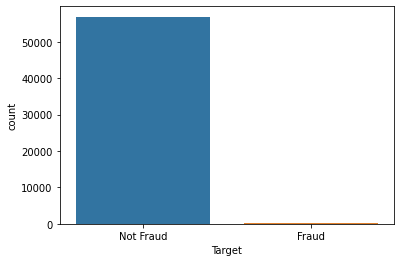

In [ ]:
# visualize the target variable
g = sns.countplot(data['Target'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45492
1       77
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11372
1       21
Name: Target, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_pred, Y_test)

0.9987711752830686

In [ ]:
confusion_matrix(y_pred, Y_test)

array([[11371,    13],
       [    1,     8]])

In [ ]:
roc_auc_score(y_pred, Y_test)

0.9438734676348871

In [ ]:
# Class count
class_count_0, class_count_1 = data['Target'].value_counts()

# Separate class
class_0 = data[data['Target'] == 0]
class_1 = data[data['Target'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (56864, 30)
class 1: (98, 30)


In [ ]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [ ]:
test_under['Target'].value_counts()

1    98
0    98
Name: Target, dtype: int64

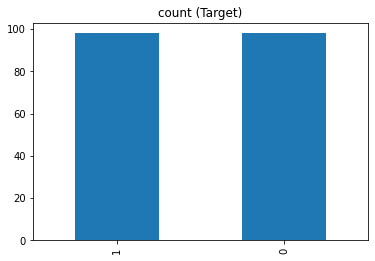

In [ ]:
test_under['Target'].value_counts().plot(kind='bar', title='count (Target)')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 56962
Resampled dataset shape 196


In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [ ]:
test_over['Target'].value_counts()

1    56864
0    56864
Name: Target, dtype: int64

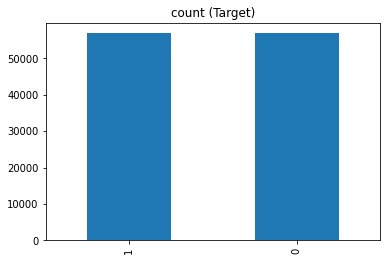

In [ ]:
test_over['Target'].value_counts().plot(kind='bar', title='count (Target)')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_ros))

Original dataset shape: 56962
Resampled dataset shape 113728


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(ratio='majority')

X_tl, y_tl = tl.fit_sample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_tl))

Original dataset shape: 56962
Resampled dataset shape 56955


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 56962
Resampled dataset shape 113728


**lets penalies for oversampling**

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.9218443796794131
Accuracy score: 0.986307381725621


NameError: ignored

**But what happens exactly in the background?**

Let's take the loss function of logistic regression:

`Loss = −ylog(p) − (1−y)log(1−p)`

In this particular form, we give equal weight to both the positive and the negative classes. When we set class_weight as `class_weight = {0:1,1:20}`, the classifier in the background tries to minimize:

```
NewLoss = −20*ylog(p) − 1*(1−y)log(1−p)
```



**So what happens exactly here?**
* If our model gives a probability of 0.3 and we misclassify a positive example, the NewLoss acquires a value of -20log(0.3) = 10.45
* If our model gives a probability of 0.7 and we misclassify a negative example, the NewLoss acquires a value of -log(0.3) = 0.52

That means we penalize our model around twenty times more when it misclassifies a positive minority example in this case.

# 6. Try Tree Based Algorithms


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

print('ROCAUC score:', roc_auc_score(Y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(Y_test, xgb_y_predict))

ROCAUC score: 0.8808204780329296
Accuracy score: 0.9992978144474678


# Let's use SMOTE + Deep Neural Network to solve this!

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
178/178 [==============================] - 4s 20ms/step - loss: 0.8291 - accuracy: 0.7752 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 2/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 3/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0579 - accuracy: 0.9836 - val_loss: 0.0351 - val_accuracy: 0.9868
Epoch 4/20
178/178 [==============================] - 3s 19ms/step - loss: 0.2044 - accuracy: 0.9568 - val_loss: 0.0330 - val_accuracy: 0.9924
Epoch 5/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0457 - accuracy: 0.9818 - val_loss: 0.0193 - val_accuracy: 0.9914
Epoch 6/20
178/178 [==============================] - 4s 20ms/step - loss: 0.0275 - accuracy: 0.9887 - val_loss: 0.0230 - val_accuracy: 0.9870
Epoch 7/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0195 - val_accuracy: 0.9932

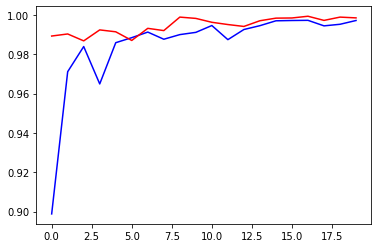

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [ ]:
y_pred_nn = model.predict_classes(val_ds)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print('ROCAUC score:', roc_auc_score(y_test, y_pred_nn))
print('Accuracy score:', accuracy_score(y_test, y_pred_nn))

ROCAUC score: 0.998494885633584
Accuracy score: 0.9985052316890882


# That looks great! Fraudsters, here I come!